---

# **Importing of Libraries**

- In this section, we will import all the essential libraries that will be used to convert and validate the image data to text.

---

In [ ]:
import os
import cv2
import time
import json
import requests
import numpy as np
import pandas as pd
import urllib.request
from pylab import rcParams
from base64 import b64encode
import matplotlib.pyplot as plt
from IPython.display import Image

---

# **Environment Initialization**

- In this section, we will initialize service account file, endpoint URL, API key, and image path.

---

In [ ]:
# Setting up service account file to the current environment
# Note: service account file should not be shared. It should be private
# Replace path of your service account file in the following instruction
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "service-account-file.json"

# Setting up figure size of 15 X 7 for the image
rcParams['figure.figsize'] = 15, 7

# Initializing endpoint url, api key, and image location
# Endpoint can be retrieved from the google apis documentation
ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'

# Replace your API key in the following instruction
api_key = "Your API key"

userinput = int(input('Enter 1 for local image\n Enter 2 for Remote Image: '))

if userinput == 1:
    # Path of local image; Add your image path in the following instruction
    img_loc = "Image.PNG"
elif userinput == 2:
    # Path of Remote image: Add your image link in the following instruction
    remote_loc = "https://www.shakedeal.com/blog/content/images/2019/12/Signboard.png"
    remoteimage = urllib.request.urlretrieve(url=remote_loc, filename="RemoteImage.png")
    img_loc = remoteimage[0]

Enter 1 for local image
 Enter 2 for Remote Image: 1


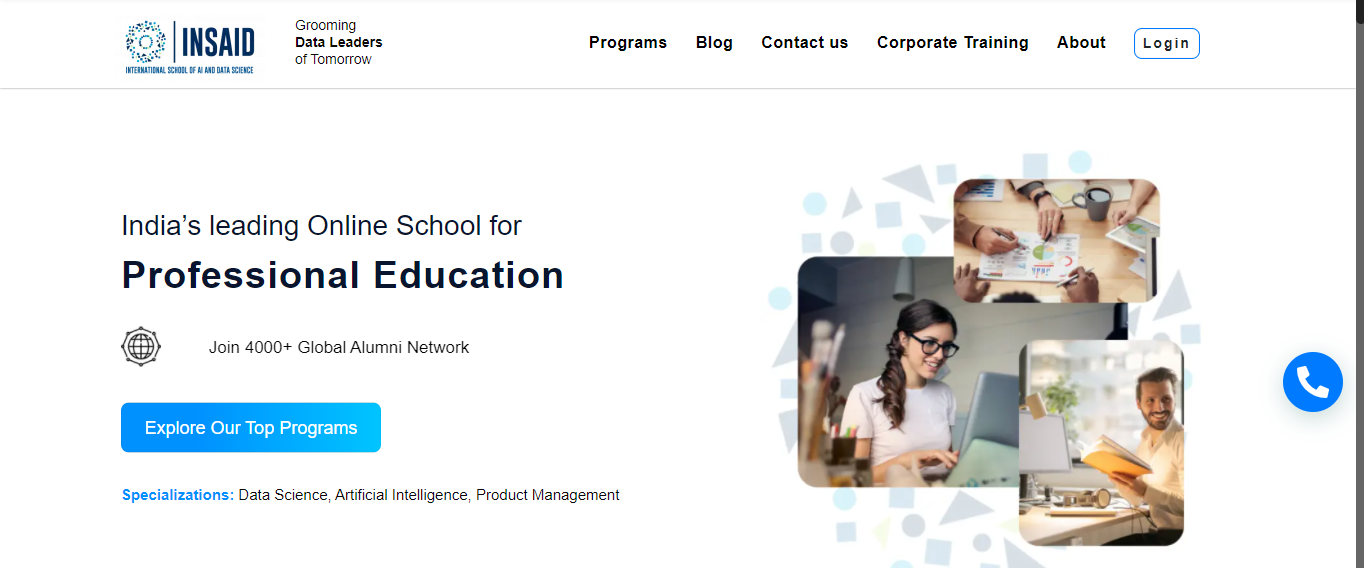

In [ ]:
# Displaying the original image
Image(img_loc)

---

# **Getting of Response**

- In this section, we will encode the image and perform the POST request to the server and get a response.

---

In [ ]:
# Initializing image request with none
img_req = None

# Preparing image data to be sent in json format
with open(img_loc, 'rb') as f:
    ctxt = b64encode(f.read()).decode()
    img_req = {
      'image': {
          'content': ctxt
      },
      'features': [{
          'type': 'DOCUMENT_TEXT_DETECTION',
          'maxResults': 1
      }]
    }

# Encoding image data for transmission
imgdata = json.dumps({"requests": img_req}).encode()

# Creating a response from URL, data, parameters and headers
response = requests.post(url=ENDPOINT_URL, 
                         data=imgdata, 
                         params={'key': api_key}, 
                         headers = {'Content-Type': 'application/json'})

# Validating if the response received is success or not
if response.status_code != 200 or response.json().get('error'):
    print ("Error Result: ", response)
elif response.status_code == 200:
    print("JSON Response: ", response, "i.e. Success!")

JSON Response:  <Response [200]> i.e. Success!


---

# **Text Extraction**

- In this section, we will convert the response and save it as a JSON which will futher be used to extract all the text.

---

In [ ]:
# You can use the following code to visualize the json data
# For reference use https://jsonformatter.org/ to beautify the text
# Serializing json data
json_object = json.dumps(obj=response.json(), indent=4)
  
# Writing to sample.json
with open(file="sample.json", mode="w") as outfile:
    outfile.write(json_object)

# The JSON information can be extracted using the jsonformatter
# The information may vary JSON to JSON response
# It is better to experiment and identify the text to extract
read_json = json.loads(s=json_object)
responses = read_json["responses"][0]
textAnnotations = responses['textAnnotations']
all_text = textAnnotations[0]
print('----------Text Detected in Image----------\n')
print(all_text['description'])

----------Text Detected in Image----------

INSAID
Grooming
Data Leaders
of Tomorrow
Programs
Blog
Contact us
Corporate Training
About
Login
INTERNATIONAL SCHOOL OF M AND DATA SCIENCE
India's leading Online School for
Professional Education
Join 4000+ Global Alumni Network
Explore Our Top Programs
Specializations: Data Science, Artificial Intelligence, Product Management



---

# **Validation of Text Extraction**

- In this section, we will use Computer Vision library to confirm whether the text extraction successfuly worked or not.

---

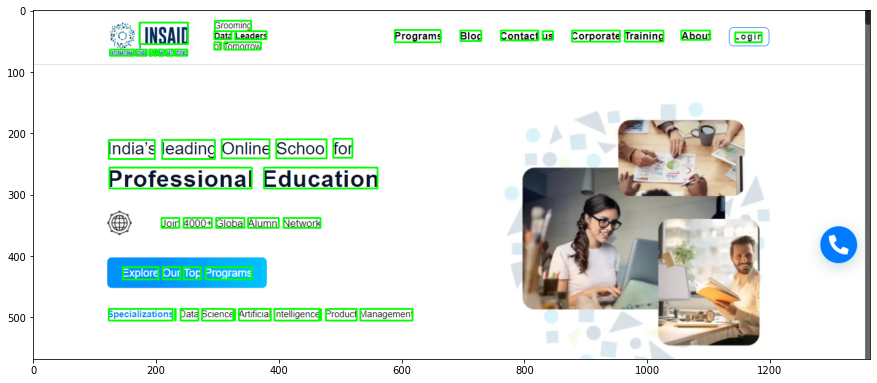

In [ ]:
def getCoordinates(response):
    """
    Extracts and returns the coordinates of the text using JSON file.
    """
    cord_df = pd.DataFrame(data=response['boundingPoly']['vertices'])
    x_min, y_min = np.min(cord_df["x"]), np.min(cord_df["y"])
    x_max, y_max = np.max(cord_df["x"]), np.max(cord_df["y"])
    return response["description"], x_max, x_min, y_max, y_min

# Reading image using CV2
image = cv2.imread(filename=img_loc)

# Extracting all the coordinates using the JSON data
for i in range(1, len(textAnnotations)):
    text, x_max, x_min, y_max, y_min = getCoordinates(textAnnotations[i])
    cv2.rectangle(img=image, pt1=(x_min, y_min), pt2=(x_max, y_max), color=(0, 255, 0), thickness=2)

# Display the final image with bounding boxes
plt.imshow(X=cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB))
plt.show()